# Mod 5 Project: Classifying Life Expectancy (World Health Organization Data)

**Group Partners: Filis, Manisha, Pablo**

___

Ran the following commands in terminal to install Profiling (visualizing data), and Altair (map):

```
conda install -c conda-forge altair vega_datasets notebook vega
```

```
conda install -c anaconda pandas-profiling
```

### Import libraries

In [73]:
import pandas as pd  
import numpy as np

import plotly.plotly as py 
import plotly 
import cufflinks as cf 
import pandas as pd 
import numpy as np 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True) 
cf.go_offline()


#Making Visualizations
import altair as alt
alt.renderers.enable('notebook')
from vega_datasets import data

#Displaying EDA Profile
import pandas_profiling

#Disabling warnings 
import warnings
warnings.filterwarnings('ignore')

### Read in csv and display first few rows

In [74]:
df = pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Seeing if data is time series

In [75]:
df_group = df.set_index(['Country','Year'])
df_group.head()

Status  Life expectancy   Adult Mortality  \
Country     Year                                                  
Afghanistan 2015  Developing              65.0            263.0   
            2014  Developing              59.9            271.0   
            2013  Developing              59.9            268.0   
            2012  Developing              59.5            272.0   
            2011  Developing              59.2            275.0   

                  infant deaths  Alcohol  percentage expenditure  Hepatitis B  \
Country     Year                                                                
Afghanistan 2015             62     0.01               71.279624         65.0   
            2014             64     0.01               73.523582         62.0   
            2013             66     0.01               73.219243         64.0   
            2012             69     0.01               78.184215         67.0   
            2011             71     0.01                7.097109         68.0   

                  Measles    BMI   under-five deaths   Polio  \
Country     Year                                               
Afghanistan 2015      1154   19.1                  83    6.0   
            2014       492   18.6                  86   58.0   
            2013       430   18.1                  89   62.0   
            2012      2787   17.6                  93   67.0   
            2011      3013   17.2                  97   68.0   

                  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
Country     Year                                                          
Afghanistan 2015               8.16         65.0        0.1  584.259210   
            2014               8.18         62.0        0.1  612.696514   
            2013               8.13         64.0        0.1  631.744976   
            2012               8.52         67.0        0.1  669.959000   
            2011               7.87         68.0        0.1   63.537231   

                  Population   thinness  1-19 years   thinness 5-9 years  \
Country     Year                                                           
Afghanistan 2015  33736494.0                   17.2                 17.3   
            2014    327582.0                   17.5                 17.5   
            2013  31731688.0                   17.7                 17.7   
            2012   3696958.0                   17.9                 18.0   
            2011   2978599.0                   18.2                 18.2   

                  Income composition of resources  Schooling  
Country     Year                                              
Afghanistan 2015                            0.479       10.1  
            2014                            0.476       10.0  
            2013                            0.470        9.9  
            2012                            0.463        9.8  
            2011                            0.454        9.5

In [138]:
# countries = df['Country'].unique()
# for country in countries:
#     df_group.loc[country].iplot(y='Life expectancy ')
#     print(country)

In [137]:
# import matplotlib.pyplot as plt
# %matplotlib inline

# countries = df['Country'].unique()
# fig = plt.figure(figsize=(14,12))
# ax = fig.add_subplot(111)

# # X = 
# for country in countries[:20]:
# #     df_group.loc[country].iplot(y='Life expectancy ')
#     df_group.loc[country].iplot(y='Life expectancy ', ax=ax)
    

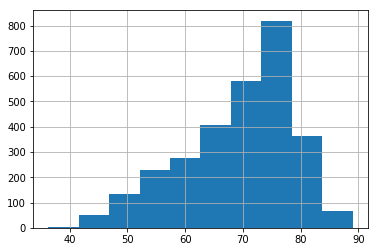

In [78]:
df['Life expectancy '].hist()

In [106]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

### Displaying length of rows and columns in our dataset 

In [79]:
df.shape

(2938, 22)

### Use profiling to speed up EDA

In [80]:
# profile = pandas_profiling.ProfileReport(df)

In [81]:
# from IPython.core.display import display, HTML
# display(HTML(profile.html))


### Display column names and background research on column descriptions 

In [96]:
df1 = df[df.isna().any(axis=1)]
df1

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
44,Algeria,2003,Developing,71.7,146.0,20,0.34,25.018523,NaN,15374,...,87.0,3.60,87.0,0.1,294.335560,3243514.0,6.3,6.1,0.663,11.5
45,Algeria,2002,Developing,71.6,145.0,20,0.36,148.511984,NaN,5862,...,86.0,3.73,86.0,0.1,1774.336730,3199546.0,6.3,6.2,0.653,11.1
46,Algeria,2001,Developing,71.4,145.0,20,0.23,147.986071,NaN,2686,...,89.0,3.84,89.0,0.1,1732.857979,31592153.0,6.4,6.3,0.644,10.9
47,Algeria,2000,Developing,71.3,145.0,21,0.25,154.455944,NaN,0,...,86.0,3.49,86.0,0.1,1757.177970,3118366.0,6.5,6.4,0.636,10.7
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
57,Angola,2006,Developing,47.7,381.0,90,5.84,25.086888,NaN,765,...,36.0,4.54,34.0,2.5,262.415149,2262399.0,9.8,9.7,0.439,7.2
58,Angola,2005,Developing,47.4,382.0,92,5.04,98.191451,NaN,258,...,39.0,4.10,38.0,2.6,1443.991929,19552542.0,1.0,9.9,0.426,6.8
59,Angola,2004,Developing,47.1,386.0,94,3.53,8.866777,NaN,29,...,4.0,4.71,4.0,2.5,141.868440,18865716.0,1.2,1.1,0.415,6.4
60,Angola,2003,Developing,46.8,388.0,95,3.49,35.933491,NaN,1196,...,4.0,4.41,4.0,2.4,779.468356,1823369.0,1.4,1.3,0.406,5.9


In [10]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

`Status`
Developed or Developing status

`Life expectancy` 
Life Expectancy in age

`Adult Mortality`
Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

`infant deaths`
Number of Infant Deaths per 1000 population

`Alcohol`
Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

`percentage expenditure`
Expenditure on health as a percentage of Gross Domestic Product per capita(%)

`Hepatitis B`
Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

`Measles` 
Measles - number of reported cases per 1000 population

`BMI` 
Average Body Mass Index of entire population

`under-five deaths` 
Number of under-five deaths per 1000 population

`Polio`
Polio (Pol3) immunization coverage among 1-year-olds (%)

`Total expenditure`
General government expenditure on health as a percentage of total government expenditure (%)

`Diphtheria` 
Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

`HIV/AIDS`
Deaths per 1 000 live births HIV/AIDS (0-4 years)

`GDP`
Gross Domestic Product per capita (in USD)

`Population`
Population of the country

`thinness 1-19 years`
Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

`thinness 5-9 years`
Prevalence of thinness among children for Age 5 to 9(%)

`Income composition of resources`
Human Development Index in terms of income composition of resources (index ranging from 0 to 1) url: http://hdr.undp.org/en/content/human-development-index-hdi

`Schooling`
Number of years of Schooling(years)

### Mapping life expectency for 2015

In [11]:
print('Maximum year is', df['Year'].max())
print('Minimum year is', df['Year'].min())


Maximum year is 2015
Minimum year is 2000


Let's filter by 2015 to make a map of life expectency per country. 

In [12]:
df_2015 = df[df['Year']==2015]

### Reading in the country codes tsv to make the map (file generated from UN stats webpage: 
https://unstats.un.org/unsd/methodology/m49/  

In [13]:
country_codes = pd.read_csv('country_code_2.tsv',sep='\t')
country_codes.head()

,Country or Area,M49 code,ISO-alpha3 code
0,Afghanistan,4,AFG
1,Aland Islands,248,ALA
2,Albania,8,ALB
3,Algeria,12,DZA
4,American Samoa,16,ASM


### Matching countries to country names in country codes tsv data

In [14]:
df_2015.replace("Côte d'Ivoire", "Cote d'Ivoire", inplace=True)
df_2015.replace('Swaziland', 'Eswatini', inplace=True)
df_2015.replace('The former Yugoslav republic of Macedonia', 'North Macedonia', inplace=True)

df_2015_map = df_2015.merge(country_codes, how="left", left_on="Country",right_on="Country or Area")
df_2015_map.rename(columns={'M49 code': 'id'}, inplace=True)
df_2015_map.drop(columns=['ISO-alpha3 code', 'Country or Area'], inplace=True)

df_2015_map['tooltip']=df_2015_map['Country']+': '+df_2015_map['Life expectancy '].astype(str) + ' yr'

### Looking at the codes from geojson file (map feature) which defines border for all the countries. 

In [15]:
# map_codes = [x['id'] for x in data.world_110m()['objects']['countries']['geometries']]
# map_codes

### Making the map!

In [16]:
source = alt.topo_feature(data.world_110m.url,'countries')

plt = alt.Chart(source).mark_geoshape().encode(
    color=alt.Color('Life expectancy :Q', legend=alt.Legend(title='Years')),
    tooltip='tooltip:N'
).transform_lookup(
   lookup='id',
   from_=alt.LookupData(df_2015_map, 'id', ['Life expectancy ', 'tooltip'])
).project(
   type='equirectangular'
).properties(
    width=900,
    height=540,
    title=('Life Expectency in Years')
)


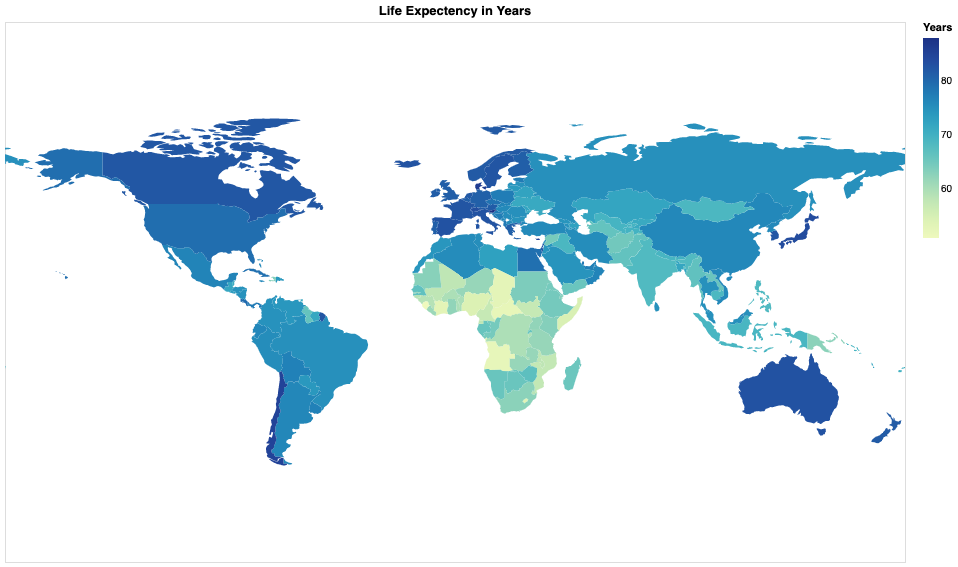

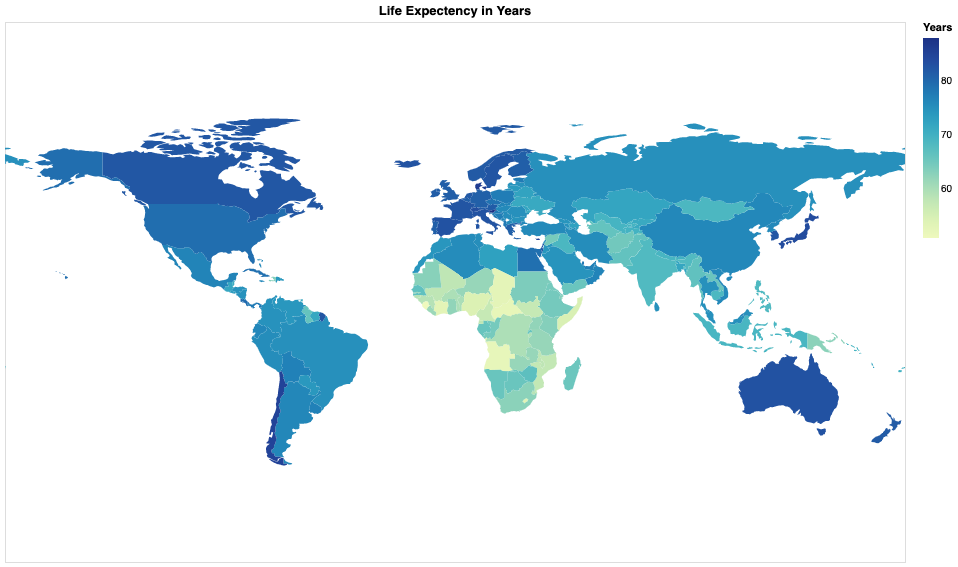

In [17]:
plt

## Formulating the research question

**What are the most important feaures which contribute to life expectancy?**

**How can we best predict life expectancy?**

In [107]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

### Drop NaN's and check remaining length of dataframe

In [108]:
df_nona = df.dropna()

In [109]:
df_nona.shape

(1649, 22)

### Rename Life expectancy column to target

In [110]:
df_nona.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [111]:
df_nona.rename(columns={'Life expectancy ':'target'}, inplace=True)

In [112]:
df_nona.head()

,Country,Year,Status,target,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Make bootstrap with replacement to normalize the target column and find the true mean as a place to split the data at a certain age, and anything a above that age will be 1 for long life expectancy and 0 for low life expectancy. 

In [113]:
age = []
for i in range(1000):
    x_age = np.random.choice(df_nona['target'],size=500)
    age.append(x_age.mean())
print(np.mean(age))

69.285444


In [114]:
df_nona['target'].describe()

count    1649.000000
mean       69.302304
std         8.796834
min        44.000000
25%        64.400000
50%        71.700000
75%        75.000000
max        89.000000
Name: target, dtype: float64

In [115]:
median_age = np.median(df_nona['target'])
df_nona['target'] = df_nona.target.apply(lambda x: 1 if x >= median_age  else 0)

In [116]:
df_nona.head()

,Country,Year,Status,target,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,0,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,0,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,0,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,0,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [117]:

df_nona['Country'].nunique()

133

In [118]:
count = 0 
for country in df_nona['Country'].unique() : 
    check = df_nona.loc[df_nona['Country']== country, 'target'].nunique()
    if (check == 1):
      
        count +=1
    else:
        print(country)

Azerbaijan
Bangladesh
Belarus
Brazil
Bulgaria
Cabo Verde
Colombia
Dominican Republic
El Salvador
Guatemala
Honduras
Iraq
Latvia
Lithuania
Maldives
Mauritius
Morocco
Nicaragua
Romania
Russian Federation
Samoa
Sri Lanka
Suriname
Thailand
Tonga
Trinidad and Tobago
Turkey
Ukraine
Vanuatu


In [119]:
count / df_nona['Country'].nunique()

0.7819548872180451

In [120]:
#show that the model is able to generalize to different countries the model has not seen before

In [121]:
df_nona[df_nona['Country']=='Brazil']

,Country,Year,Status,target,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
353,Brazil,2014,Developing,1,144.0,44,7.32,83.164654,96.0,876,...,96.0,8.32,93.0,0.1,1226.617310,24213133.0,2.7,2.7,0.747,15.2
354,Brazil,2013,Developing,1,146.0,46,7.24,916.270845,96.0,220,...,96.0,8.48,97.0,0.1,12216.944600,2248632.0,2.8,2.7,0.734,14.2
355,Brazil,2012,Developing,1,148.0,49,7.55,843.194626,96.0,2,...,96.0,8.26,95.0,0.1,12291.466850,256983.0,2.8,2.8,0.730,14.2
356,Brazil,2011,Developing,1,152.0,51,7.58,1084.999766,98.0,43,...,98.0,8.90,99.0,0.1,13167.472890,198686688.0,2.9,2.8,0.724,14.0
357,Brazil,2010,Developing,1,154.0,54,7.52,1111.191325,96.0,68,...,99.0,8.27,99.0,0.1,11224.154800,196796269.0,2.9,2.9,0.716,13.8
358,Brazil,2009,Developing,1,157.0,57,7.33,564.523390,99.0,0,...,99.0,8.65,99.0,0.1,8553.384700,194895996.0,3.0,2.9,0.714,13.8
359,Brazil,2008,Developing,1,158.0,61,7.21,526.378064,96.0,0,...,99.0,8.24,99.0,0.1,8787.613750,19297929.0,3.0,3.0,0.704,13.3
360,Brazil,2007,Developing,1,159.0,65,7.19,394.932130,99.0,0,...,99.0,8.28,99.0,0.1,7313.557962,19126637.0,3.1,3.0,0.700,13.5
361,Brazil,2006,Developing,1,161.0,70,7.10,30.303747,99.0,57,...,99.0,8.36,99.0,0.1,586.145975,18912412.0,3.1,3.1,0.698,13.8
362,Brazil,2005,Developing,1,163.0,75,6.97,23.763701,98.0,6,...,99.0,8.27,99.0,0.1,477.182746,186917361.0,3.2,3.1,0.694,13.8


In [122]:
df_nona.target.value_counts()

1    828
0    821
Name: target, dtype: int64

In [123]:
#developed = 0, developing =1
#look into dropping one
df_nona = pd.concat([df_nona, pd.get_dummies(df_nona['Status'])], axis=1)
df_nona.head()

,Country,Year,Status,target,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,Afghanistan,2015,Developing,0,263.0,62,0.01,71.279624,65.0,1154,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,Afghanistan,2014,Developing,0,271.0,64,0.01,73.523582,62.0,492,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,Afghanistan,2013,Developing,0,268.0,66,0.01,73.219243,64.0,430,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,Afghanistan,2012,Developing,0,272.0,69,0.01,78.184215,67.0,2787,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,Afghanistan,2011,Developing,0,275.0,71,0.01,7.097109,68.0,3013,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1


In [124]:
df_nona.drop(['Status'], axis=1, inplace=True)
df_nona.head()

,Country,Year,target,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,Afghanistan,2015,0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,Afghanistan,2014,0,271.0,64,0.01,73.523582,62.0,492,18.6,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,Afghanistan,2013,0,268.0,66,0.01,73.219243,64.0,430,18.1,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,Afghanistan,2012,0,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,Afghanistan,2011,0,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1


### Define X and y

In [125]:
from random import randint
all_countries = df.Country.unique()
# Choose random countries
num_to_withhold = 100
withhold_countries = set([])
while len(withhold_countries) < num_to_withhold:
    # Get a random integer so we can choose a random country
    withhold_countries.add(all_countries[randint(0, len(all_countries) - 1)])

withhold_countries = list(withhold_countries)
training_countries = [country for country in all_countries if (country not in withhold_countries)]


df_train = df_nona[df_nona['Country'].isin(training_countries)]
df_test = df_nona[df_nona['Country'].isin(withhold_countries)]

In [126]:
100/len(all_countries)

0.5181347150259067

In [127]:
y = df_train['target']
X = df_train.drop(['target'], axis=1)

In [128]:
X.drop(['Country'], axis=1, inplace = True)

### Split data 

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Decision Tree

In [131]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree 
classifier = DecisionTreeClassifier(random_state=10)  
classifier.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [132]:
y_pred = classifier.predict(X_test)  

In [133]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is :{0}".format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is :95.36082474226805

AUC is :0.96

Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,99,7,106
1,2,86,88
All,101,93,194


In [48]:
# The model misclassified 33 rows

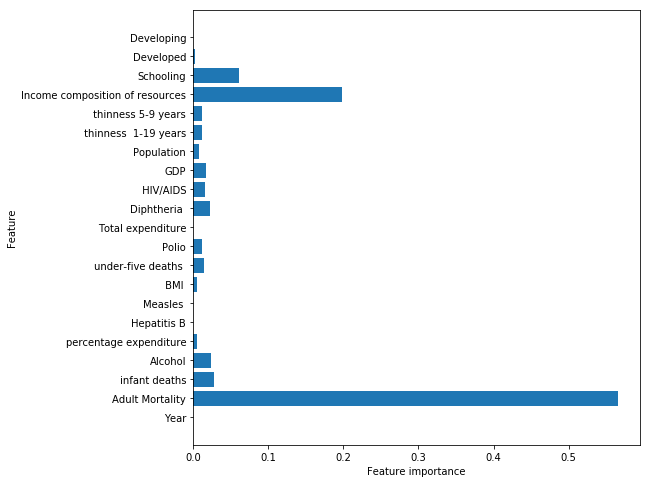

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

classifier.feature_importances_
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(classifier)

The Income composition of resources which is the Human Development Index combines education, life expectency, and GNI index (economic factor). 

## Random Forrest  
without Income composition of resources and Adult Mortality

In [50]:
y
X.drop(['Adult Mortality','Income composition of resources','Population','GDP','Year'], axis=1, inplace=True)

In [51]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [53]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
forest.score(X_train, y_train)

0.9577235772357724

In [55]:
forest.score(X_test, y_test)

0.9271844660194175

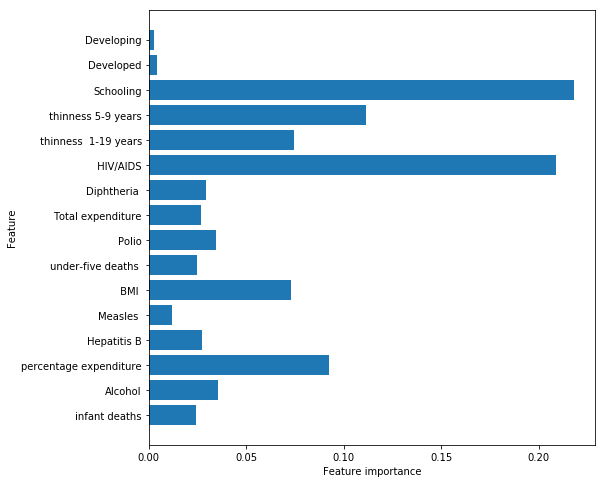

In [56]:
plot_feature_importances(forest)

### Grid search to optimize the random forest model

In [57]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [30, 100, 300],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [2, 4, 6]
}

In [58]:
gs = GridSearchCV(forest, param_grid, cv=5)
gs.fit(X_train, y_train)
gs.score(X_test, y_test)
gs.best_params_

{'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}

In [59]:
gs.score(X_test, y_test)


0.912621359223301

In [60]:
gs.best_score_

0.9040650406504065

In [61]:
forest2 = RandomForestClassifier(min_samples_split=2, min_samples_leaf=2, n_estimators=30, max_depth= 5)
forest2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [62]:
forest2.score(X_train, y_train)

0.943089430894309

In [63]:
forest2.score(X_test, y_test)

0.9077669902912622

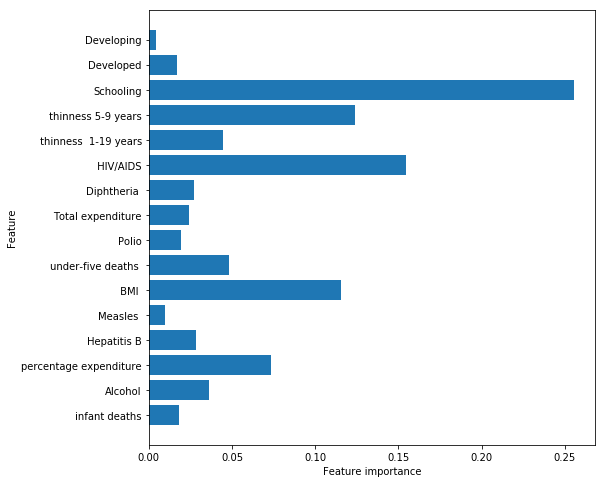

In [64]:
plot_feature_importances(forest2)

### Conclusions

School is an important factor in predicting whether people live long (> 71 years old) or not. Followed by AIDS and BMI. If this was a business such as a non-governmental organization trying to improve people's lives, then perhaps improving the healthcare system to lower mortality and make education available to all. 

In [65]:
df_test.head()

,Country,Year,target,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,Afghanistan,2015,0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,Afghanistan,2014,0,271.0,64,0.01,73.523582,62.0,492,18.6,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,Afghanistan,2013,0,268.0,66,0.01,73.219243,64.0,430,18.1,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,Afghanistan,2012,0,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,Afghanistan,2011,0,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1


In [66]:
y_test_2 = df_test['target']

X_test_2 = df_test.drop(['Country', 'target','Adult Mortality','Income composition of resources'], axis=1)
y_pred_2 = forest2.predict(X_test_2)

acc = accuracy_score(y_test_2,y_pred_2) * 100
print("Accuracy is :{0}".format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_2, y_pred_2)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test_2, y_pred_2, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is :85.74879227053141

AUC is :0.85

Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,305,95,400
1,23,405,428
All,328,500,828



It's 88% accurate on countries it is never seen before when 70 countries (36%) were completely withheld from training. 

When we increased the number to 100 countries (trained on the remaining), the accuracy dropped to 85%



In [70]:
num_to_withhold

100

Predict which countries are high risk vs low risk for future population stability 
Immigration helps repopulate the young people
Healthcare 

In [178]:
!pip uninstall scikit-learn # until no more scikit-learn is present
!pip install scikit-learn

Uninstalling scikit-learn-0.20.3:
  Would remove:
    /anaconda3/lib/python3.7/site-packages/scikit_learn-0.20.3.dist-info/*
    /anaconda3/lib/python3.7/site-packages/sklearn/*
Proceed (y/n)? ^C
Operation cancelled by user


33      1
34      1
35      1
36      1
37      1
38      1
39      1
40      1
41      1
42      1
43      1
113     1
114     1
115     1
116     1
117     1
118     1
119     1
120     1
121     1
122     1
123     1
124     1
125     1
126     1
145     1
146     1
147     1
148     0
149     0
       ..
2843    1
2844    0
2845    0
2846    0
2847    0
2848    1
2849    1
2850    1
2851    0
2852    0
2853    0
2854    0
2855    0
2856    0
2857    0
2923    0
2924    0
2925    0
2926    0
2927    0
2928    0
2929    0
2930    0
2931    0
2932    0
2933    0
2934    0
2935    0
2936    0
2937    0
Name: target, Length: 773, dtype: int64

### Using the pipeline on **my** data

In [189]:
# ! pip install pipelines==0.0.12
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict
from sklearn import preprocessing
from sklearn import metrics
from sklearn import svm

In [183]:
classifier_pipeline = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1))

In [194]:
# KFold/StratifiedKFold cross validation with 3 folds (the default)
# applying the classifier pipeline to the feature and target data
scores =cross_val_score(classifier_pipeline, X, y, cv=10)


In [195]:
#These are the different accuracy scores for given k-values
scores

array([0.79487179, 0.93589744, 0.93589744, 0.74025974, 0.76623377,
       0.68831169, 0.83116883, 0.88311688, 0.7012987 , 0.84415584])

In [196]:
scores.mean()

0.8121212121212121